In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/MiniHackathon/ModelwithPredata/trainLineFinal.zip"

Streaming output truncated to the last 5000 lines.
  inflating: trainLineFinal/f836400a-Cordia_New-16px-normal-bold.png  
  inflating: trainLineFinal/f8365b79-Kunlasatri-16px-italic-normal.png  
  inflating: trainLineFinal/f836bdf1-FC_Knomphing_Regular-16px-italic-bold.png  
 extracting: trainLineFinal/f8373e91-TH_Charm_of_AU-18px-italic-normal.png  
  inflating: trainLineFinal/f837682d-TH_Chakra_Petch-14px-italic-bold.png  
 extracting: trainLineFinal/f837c1a7-TH_Mali_Grade6-16px-italic-normal.png  
  inflating: trainLineFinal/f837cb02-TH_Chakra_Petch-16px-normal-bold.png  
  inflating: trainLineFinal/f83829ec-Angsana_New-14px-italic-normal.png  
  inflating: trainLineFinal/f838cc33-Cordia_New-24px-normal-normal.png  
  inflating: trainLineFinal/f83a420c-TH_Sarabun-12px-italic-normal.png  
  inflating: trainLineFinal/f83a4c9d-fonttintin-14px-normal-bold.png  
  inflating: trainLineFinal/f83b2d5-DM_Shining_Star_Regular-12px-italic-bold.png  
  inflating: trainLineFinal/f83b4cb-TH_Mali_

In [3]:
import os
from pathlib import Path
from os import listdir
import keras
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D , UpSampling2D ,Conv2DTranspose
import pandas as pd
import tensorflow as tf
import keras
from keras import utils
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import layers, Model
import gc
from tensorflow.keras.applications.resnet50 import ResNet50
from random import  uniform

In [4]:
# Path to the data directory
data_dir1 = Path("/content/trainLineFinal")
# Get list of all the images
images = listdir(data_dir1)

In [5]:
def conv_label(label,label1):
  if label == 'Angsana_New':
      x=7*0
  elif label == 'Cordia_New':
      x = 7*1
  elif label == 'DM_Shining_Star_Regular':
      x = 7*2
  elif label == 'FC_Knomphing_Regular':
      x = 7*3
  elif label == 'fonttintin':
      x = 7*4
  elif label == 'Kunlasatri':
      x = 7*5
  elif label == 'TH_Chakra_Petch':
      x = 7*6
  elif label == 'TH_Charm_of_AU':
      x = 7*7
  elif label == 'TH_Mali_Grade6':
      x = 7*8
  elif label == 'TH_Sarabun':
      x = 7*9
      
  if label1 == '12px':
      x+=0
  elif label1 == '14px':
      x+=1
  elif label1 == '16px':
      x+=2
  elif label1 == '18px':
      x+=3
  elif label1 == '20px':
      x+=4
  elif label1 == '22px':
      x+=5
  elif label1 == '24px':
      x+=6

  return x

In [10]:
data=[]
labels=[]
for img in images:
  img2 = cv2.imread("/content/trainLineFinal/"+img)
  #img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
  img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
  threshold, binarizedImage = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  #binarizedImage = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 199, 5)
  img_height=100
  img_width=100
  dim=(img_height,img_width)
  resized = cv2.resize(binarizedImage, dim)
  label = img.split(".png")[0].split('-')[1]
  label1 = img.split(".png")[0].split('-')[2]
  labels.append(conv_label(label,label1))

In [9]:
data=[]
labels=[]
for img in images:
  img2 = cv2.imread("/content/trainLineFinal/"+img)
  #img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
  img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
  threshold, binarizedImage = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  #binarizedImage = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 199, 5)
  img_height=100
  img_width=100
  dim=(img_height,img_width)
  resized = cv2.resize(binarizedImage, dim)
  label = img.split(".png")[0].split('-')[1]
  label1 = img.split(".png")[0].split('-')[2]

  if label1=='12px' or label1=='14px' or label1=='16px':
    random_number=uniform(0, 1)
    if label1=='12px' or label1=='14px' :
      if random_number>0.5:
        data.append(resized)
        labels.append(conv_label(label,label1))
    elif label1=='16px':
      if random_number>0.75:
        data.append(resized)
        labels.append(conv_label(label,label1))
  else:
      data.append(resized)
      labels.append(conv_label(label,label1))

  # data.append(resized)
  # label = img.split(".png")[0].split('-')[1]
  # label1 = img.split(".png")[0].split('-')[2]
  # labels.append(conv_label(label,label1))

(array([2512., 2632., 5431., 1511., 1214., 1184., 1224., 2465., 2705.,
        4958., 1363., 1195., 1189., 1390., 2507., 2545., 5152., 1190.,
        1260., 1337., 1333., 2184., 2550., 5537., 1548., 1009., 1221.,
        1373., 2541., 2917., 5273., 1308., 1169., 1129., 1435., 2426.,
        2338., 5650., 1184., 1095.,  963., 1394., 2710., 2739., 5150.,
        1186., 1065., 1230., 1281., 2498., 2270., 5617., 1196., 1036.,
        1173., 1431., 2443., 2568., 5299., 1390., 1207., 1230., 1324.,
        2462., 2446., 5596., 1316., 1337., 1210., 1415.]),
 array([ 0.        ,  0.98571429,  1.97142857,  2.95714286,  3.94285714,
         4.92857143,  5.91428571,  6.9       ,  7.88571429,  8.87142857,
         9.85714286, 10.84285714, 11.82857143, 12.81428571, 13.8       ,
        14.78571429, 15.77142857, 16.75714286, 17.74285714, 18.72857143,
        19.71428571, 20.7       , 21.68571429, 22.67142857, 23.65714286,
        24.64285714, 25.62857143, 26.61428571, 27.6       , 28.58571429,
      

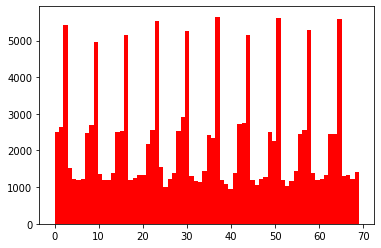

In [11]:
plt.hist(labels,bins=70,color='red')

In [ ]:
data1=np.array(data)
labels = np.array(labels)

del data

X_train, X_test, y_train, y_test = train_test_split(data1, labels, test_size=0.20, random_state=42,stratify=labels)

del data1
del labels

gc.collect()

X_train = X_train.astype('float32')
X_train/=255
X_train = X_train.reshape(X_train.shape[0], 100, 100,1)

X_test = X_test.astype('float32')
X_test/=255
X_test = X_test.reshape(X_test.shape[0], 100, 100,1)

Y_train= tf.keras.utils.to_categorical(y_train, num_classes=70, dtype='float32')
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=70, dtype='float32')

In [ ]:
resnet = tf.keras.applications.resnet50.ResNet50(include_top=False,weights= 'imagenet',input_shape= (100,100,3))

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
x_in = keras.layers.Input(shape=(100, 100, 1))
x = keras.layers.Conv2D(3, 1)(x_in)
x = resnet(x)
# fit output
x = keras.layers.Flatten()(x)

x = keras.layers.Dense(70, activation='softmax')(x)
model = Model(x_in, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 3)       6         
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 70)                2293830   
                                                                 
Total params: 25,881,548
Trainable params: 25,828,428
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/MiniHackathon/ModelwithPredata/best_modelsize_final.h5')

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss=keras.losses.CategoricalCrossentropy(),metrics=[keras.metrics.CategoricalAccuracy()])
model.fit(X_train, Y_train, batch_size=128 ,epochs=9, validation_data=(X_test,Y_test),callbacks=[checkpoint])

Epoch 1/9
2229/2229 [==============================] - ETA: 0s - loss: 1.7500 - categorical_accuracy: 0.4953

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


2229/2229 [==============================] - 256s 109ms/step - loss: 1.7500 - categorical_accuracy: 0.4953 - val_loss: 3.2067 - val_categorical_accuracy: 0.3211
Epoch 2/9
2229/2229 [==============================] - 246s 110ms/step - loss: 0.6236 - categorical_accuracy: 0.7927 - val_loss: 2.8065 - val_categorical_accuracy: 0.5124
Epoch 3/9
2229/2229 [==============================] - 245s 110ms/step - loss: 0.2952 - categorical_accuracy: 0.9019 - val_loss: 8.1717 - val_categorical_accuracy: 0.1086
Epoch 4/9
2229/2229 [==============================] - 246s 110ms/step - loss: 0.1943 - categorical_accuracy: 0.9360 - val_loss: 52.2957 - val_categorical_accuracy: 0.0250
Epoch 5/9
2229/2229 [==============================] - 246s 110ms/step - loss: 0.1684 - categorical_accuracy: 0.9447 - val_loss: 4.9557 - val_categorical_accuracy: 0.3932
Epoch 6/9
2229/2229 [==============================] - 244s 110ms/step - loss: 0.0865 - categorical_accuracy: 0.9724 - val_loss: 0.6685 - val_categorical_